<a href="https://colab.research.google.com/github/Lucas-Abrahao/projetos/blob/main/Unicornios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O Conjunto de Dados

Uma empresa unicórnio é aquela que conseguiu algo tão difícil quanto encontrar a criatura mítica: ser avaliada em 1 bilhão de dólares antes de abrir seu capital em bolsas de valores. Ou seja, a startup unicórnio é aquela que arrecada essa quantia antes de vender suas ações para o público e se tornar uma IPO (Initial Public Offering, em português “Oferta Pública Inicial” – OPI).





 Link para a base de Dados: https://www.kaggle.com/datasets/ramjasmaurya/unicorn-startups

#Importando as Libs

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#Usando a API do Kaggle

In [2]:
!pip install kaggle --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle (1).json to kaggle (1).json
User uploaded file "kaggle (1).json" with length 68 bytes
mv: cannot stat 'kaggle.json': No such file or directory


In [4]:
!kaggle competitions list

401 - Unauthorized


##Baixando e Extraindo a Base de Dados do Kaggle

In [5]:
!kaggle datasets download -d ramjasmaurya/unicorn-startups

401 - Unauthorized


In [6]:
!unzip unicorn-startups.zip

Archive:  unicorn-startups.zip
replace Startups in 2021 end.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Startups in 2021 end.csv  
replace Unicorns in June 2022s end - june 2022.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: Unicorns in June 2022s end - june 2022.csv  
replace Unicorns in april 2022s end.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: Unicorns in april 2022s end.csv  
replace in feb 2022 - Sheet1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: in feb 2022 - Sheet1.csv  
replace unicorns in march 2022.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: unicorns in march 2022.csv  


#Lendo os Dados

In [7]:
base_dados = pd.read_csv('Startups in 2021 end.csv')
base_dados.shape

(936, 8)

In [8]:
base_dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


Quais são as Colunas do Banco 

In [9]:
base_dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

Renomeando a Coluna Unnamed

In [10]:
base_dados.rename(columns = {
    'Unnamed: 0' : 'Id',}, inplace = True)

In [11]:
base_dados.head()

,Id,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


#Verificando o Tipo de Informação do Banco

In [12]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                936 non-null    int64 
 1   Company           936 non-null    object
 2   Valuation ($B)    936 non-null    object
 3   Date Joined       936 non-null    object
 4   Country           936 non-null    object
 5   City              921 non-null    object
 6   Industry          936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


# Verificando os Campos Nulos e Unicos do Banco

In [13]:
base_dados.isnull().sum()

Id                   0
Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                15
Industry             0
Select Investors     1
dtype: int64

In [14]:
base_dados.nunique()

Id                  936
Company             935
Valuation ($B)      192
Date Joined         589
Country              47
City                239
Industry             17
Select Investors    920
dtype: int64

#Conversão da Data

In [15]:
base_dados['Date Joined'] = pd.to_datetime(base_dados['Date Joined'])
base_dados.head()

,Id,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [16]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                936 non-null    int64         
 1   Company           936 non-null    object        
 2   Valuation ($B)    936 non-null    object        
 3   Date Joined       936 non-null    datetime64[ns]
 4   Country           936 non-null    object        
 5   City              921 non-null    object        
 6   Industry          936 non-null    object        
 7   Select Investors  935 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 58.6+ KB


#Transformando a Coluna Valor

In [17]:
base_dados['Valuation ($B)'] = pd.to_numeric(base_dados['Valuation ($B)'].apply(lambda Linha: Linha.replace('$' , '')))
base_dados.head()

,Id,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [18]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                936 non-null    int64         
 1   Company           936 non-null    object        
 2   Valuation ($B)    936 non-null    float64       
 3   Date Joined       936 non-null    datetime64[ns]
 4   Country           936 non-null    object        
 5   City              921 non-null    object        
 6   Industry          936 non-null    object        
 7   Select Investors  935 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 58.6+ KB


# Quais Indústrias mais Geram Unicórnios ?

In [19]:
base_dados['Industry'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Industry, dtype: int64

Arrumando o Item Finttech

In [20]:
base_dados['Industry'].loc[base_dados['Industry'] == 'Finttech']

43    Finttech
Name: Industry, dtype: object

Localizando a Empresa 

In [21]:
base_dados.loc[43]

Id                                                        43
Company                               Digital Currency Group
Valuation ($B)                                          10.0
Date Joined                              2021-11-01 00:00:00
Country                                        United States
City                                                New York
Industry                                            Finttech
Select Investors    Ribbit Capital, capitalG, Softbank Group
Name: 43, dtype: object

É uma Fintech mesmo

In [22]:
base_dados['Industry'].replace('Finttech', 'Fintech', inplace = True)

In [23]:
base_dados['Industry'].value_counts()

Fintech                                191
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Other                                   51
Supply chain, logistics, & delivery     51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Name: Industry, dtype: int64

In [24]:
base_dados['Industry'].value_counts(normalize = True)

Fintech                                0.204060
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Other                                  0.054487
Supply chain, logistics, & delivery    0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Name: Industry, dtype: float64

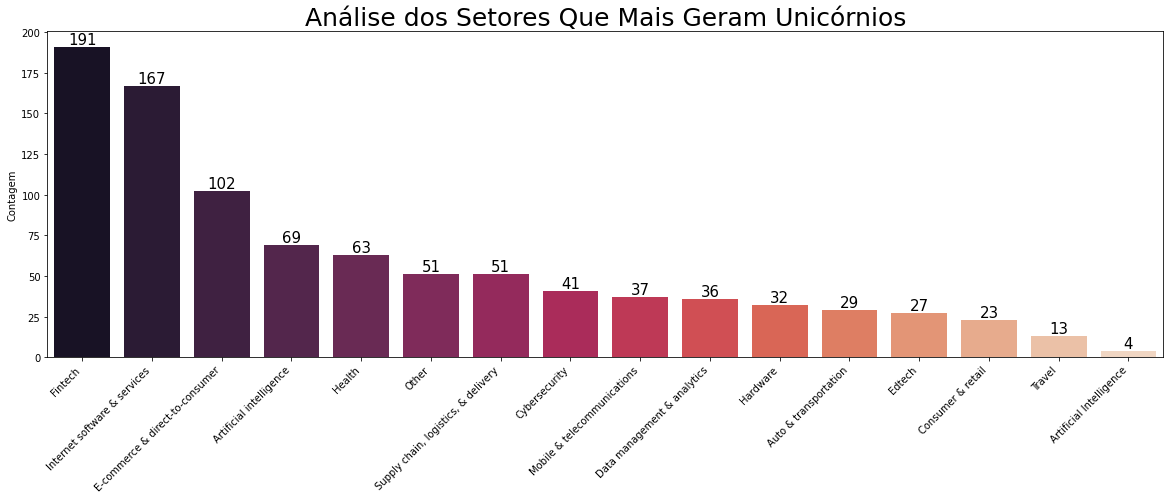

In [25]:
plt.figure(figsize = (20,6))
plt.title('Análise dos Setores Que Mais Geram Unicórnios',fontdict = { 'fontsize': 25})
ax = sns.barplot(base_dados['Industry'].value_counts().index, base_dados['Industry'].value_counts(),palette = 'rocket')

#Mostra os Valores Na Barra
for i in ax.patches:
  ax.annotate(round(i.get_height()),
              (i.get_x() + i.get_width()/2 ,i.get_height()),
              ha = 'center', va = 'baseline', 
              fontsize = 15, color = 'black', xytext = (0,3), textcoords = 'offset points')
  
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Contagem')
plt.show()

#Quais Países Mais Geram Unicórnios ?

In [26]:
base_dados['Country'].value_counts()

United States           477
China                   169
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Canada                   15
Brazil                   15
South Korea              11
Singapore                11
Hong Kong                 7
Japan                     6
Australia                 6
Mexico                    5
Netherlands               5
Indonesia                 4
Spain                     4
Sweden                    4
Switzerland               4
Ireland                   3
United Arab Emirates      3
Norway                    3
Belgium                   2
Thailand                  2
Denmark                   2
Philippines               2
Finland                   2
Colombia                  2
South Africa              2
Turkey                    2
Austria                   2
Chile                     1
Malaysia                  1
Czech Republic            1
United States,      

In [27]:
analise = round(base_dados['Country'].value_counts(normalize = True) *100, 1)
analise

United States           51.0
China                   18.1
India                    5.4
United Kingdom           4.0
Germany                  2.5
Israel                   2.2
France                   2.0
Canada                   1.6
Brazil                   1.6
South Korea              1.2
Singapore                1.2
Hong Kong                0.7
Japan                    0.6
Australia                0.6
Mexico                   0.5
Netherlands              0.5
Indonesia                0.4
Spain                    0.4
Sweden                   0.4
Switzerland              0.4
Ireland                  0.3
United Arab Emirates     0.3
Norway                   0.3
Belgium                  0.2
Thailand                 0.2
Denmark                  0.2
Philippines              0.2
Finland                  0.2
Colombia                 0.2
South Africa             0.2
Turkey                   0.2
Austria                  0.2
Chile                    0.1
Malaysia                 0.1
Czech Republic

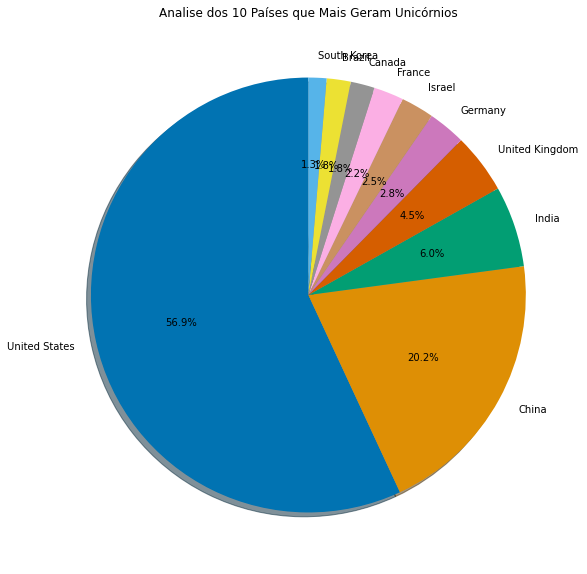

In [28]:
colors = sns.color_palette('colorblind')
plt.figure(figsize = (20,10))
plt.title('Analise dos 10 Países que Mais Geram Unicórnios')
plt.pie(analise.head(10), 
        labels =  analise.index[0:10] ,
        colors = colors,
        shadow = True, 
        startangle = 90, 
        autopct = '%1.1f%%');

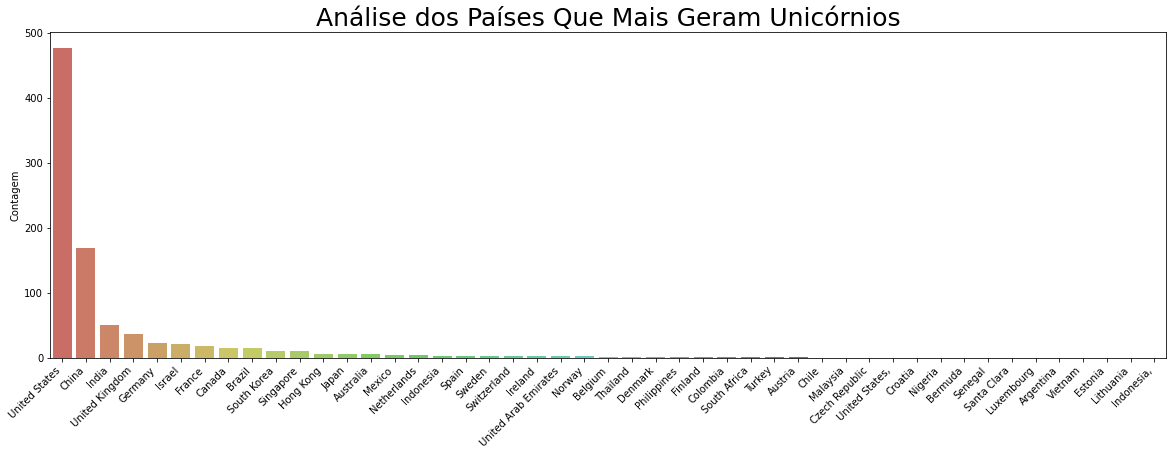

In [48]:
plt.figure(figsize = (20,6))
plt.title('Análise dos Países Que Mais Geram Unicórnios',fontdict = { 'fontsize': 25})
sns.barplot(base_dados['Country'].value_counts().index, 
            base_dados['Country'].value_counts(),
            palette = 'hls')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Contagem')
plt.show()

In [30]:
analise2 = base_dados['Country'].value_counts()
analise2 = pd.DataFrame(analise2)
analise2.rename(columns = {'Country' : 'Qtd.'}, inplace = True)
analise2.index.names = ['Pais']
analise2 = analise2.head(12)
analise2

,Qtd.
Pais,
United States,477
China,169
India,51
United Kingdom,37
Germany,23
Israel,21
France,19
Canada,15
Brazil,15


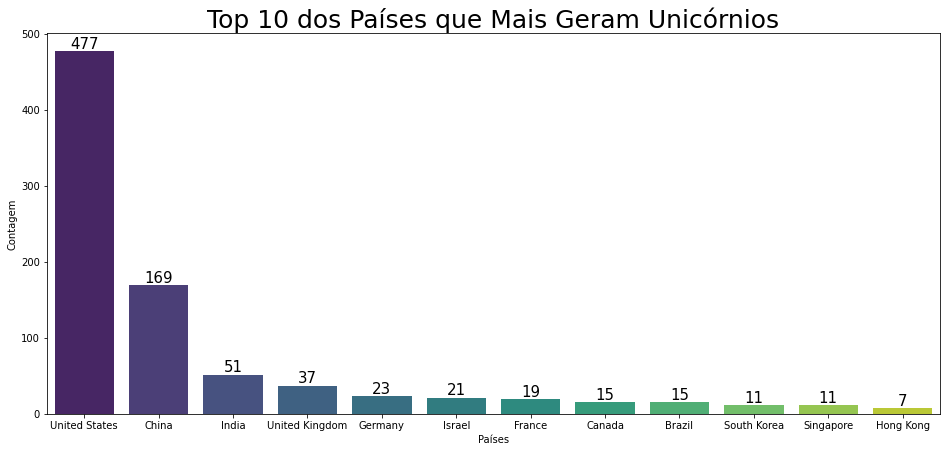

In [43]:
plt.figure(figsize = (16,7))
ax = sns.barplot(x = analise2.index,y = analise2['Qtd.'],data = analise2,palette = 'viridis')
ax.set_title('Top 10 dos Países que Mais Geram Unicórnios',fontdict = { 'fontsize': 25})

# Mostrando os Valores na Barra
for i in ax.patches:
  ax.annotate(round(i.get_height()),
              (i.get_x() + i.get_width()/2 ,i.get_height()),
              ha = 'center', va = 'baseline', 
              fontsize = 15, color = 'black', xytext = (0,3), textcoords = 'offset points')
  
plt.ylabel('Contagem')
plt.xlabel('Países')
plt.show()

#Extraindo o Ano e Mês

In [32]:
base_dados['Month'] = pd.DatetimeIndex(base_dados['Date Joined']).month
base_dados['Year'] = pd.DatetimeIndex(base_dados['Date Joined']).year
base_dados.head()

,Id,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


#Quais Foram as Empresas Unicórnio Brasileiras ?

In [33]:
by_ano = base_dados.groupby(by = ['Country', 'Year', 'Month', 'Company']).count()['Id'].reset_index()
by_ano

,Country,Year,Month,Company,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [34]:
by_ano.loc[by_ano['Country'] == 'Brazil']

,Country,Year,Month,Company,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [35]:
by_ano.loc[by_ano['Country'] == 'Brazil'].value_counts()

Country  Year  Month  Company           Id
Brazil   2018  3      Nubank            1     1
               7      Movile            1     1
               11     iFood             1     1
         2019  6      Loggi             1     1
               9      QuintoAndar       1     1
               10     EBANX             1     1
               12     Wildlife Studios  1     1
         2020  1      Loft              1     1
               12     C6 Bank           1     1
                      Creditas          1     1
         2021  1      MadeiraMadeira    1     1
               8      Nuvemshop         1     1
                      Unico             1     1
               9      1                 1     1
               10     CargoX            1     1
dtype: int64

2018 = 3
2019 = 4
2020 = 3
2021 = 5

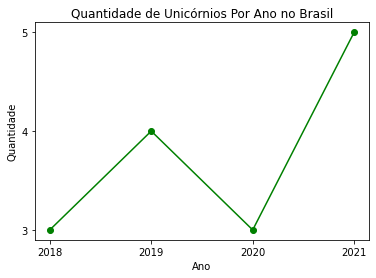

In [36]:
x = ['2018', '2019', '2020', '2021']
y = ['3', '4', '3', '5']

plt.plot(x,y,color = 'green', marker = 'o')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Quantidade de Unicórnios Por Ano no Brasil', fontdict = { 'fontsize': 12})
plt.show()

#Quanto de Patrimônio Sobre Unicórnios cada País Tem ?

In [37]:
by_country = base_dados.groupby(by = ['Country']).sum()['Valuation ($B)'].reset_index()
by_country = by_country.sort_values('Valuation ($B)', ascending = False)
by_country

,Country,Valuation ($B)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
38,Sweden,58.08
1,Australia,50.60
22,Israel,43.82
17,Hong Kong,41.45


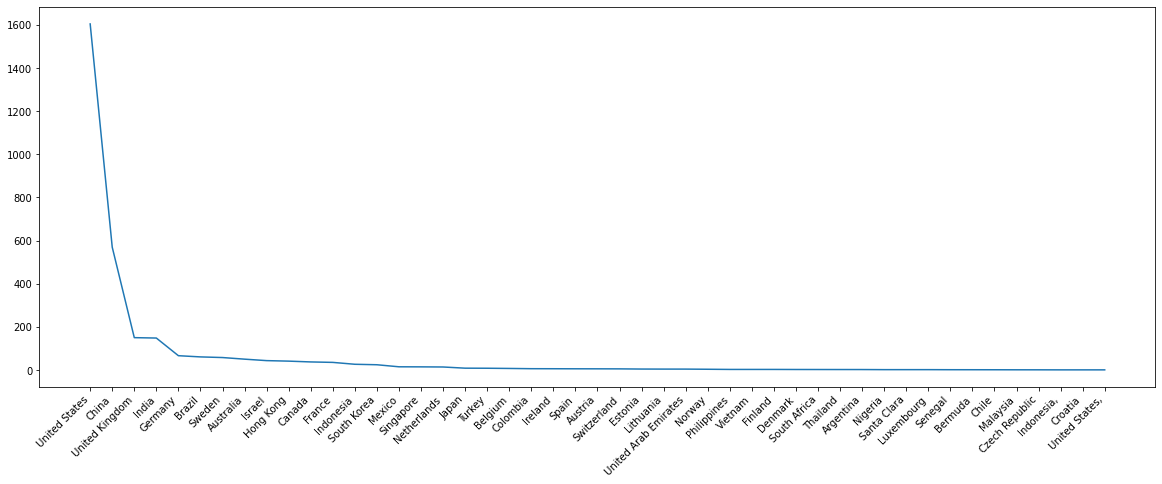

In [38]:
plt.figure(figsize = (20,7))
plt.xticks(rotation = 45 , ha = 'right')
plt.plot(by_country['Country'], by_country['Valuation ($B)'])

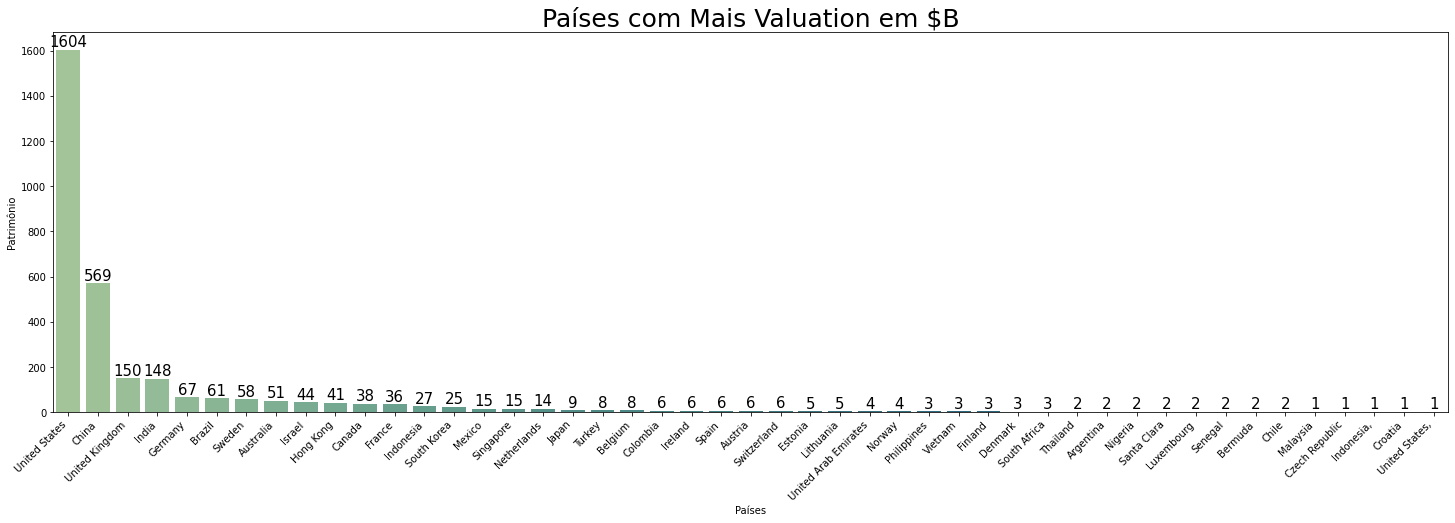

In [49]:
plt.figure(figsize = (25,7))
ax = sns.barplot(x = by_country['Country'],y = by_country['Valuation ($B)'],data = by_country,palette = 'crest')
ax.set_title('Países com Mais Valuation em $B',fontdict = { 'fontsize': 25})

# Mostrando os Valores na Barra
for i in ax.patches:
  ax.annotate(round(i.get_height()),
              (i.get_x() + i.get_width()/2 ,i.get_height()),
              ha = 'center', va = 'baseline', 
              fontsize = 15, color = 'black', xytext = (0,3), textcoords = 'offset points')
  
plt.ylabel('Patrimônio')
plt.xlabel('Países')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [40]:
by_country2 = by_country.head(10)
by_country2

,Country,Valuation ($B)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
38,Sweden,58.08
1,Australia,50.60
22,Israel,43.82
17,Hong Kong,41.45


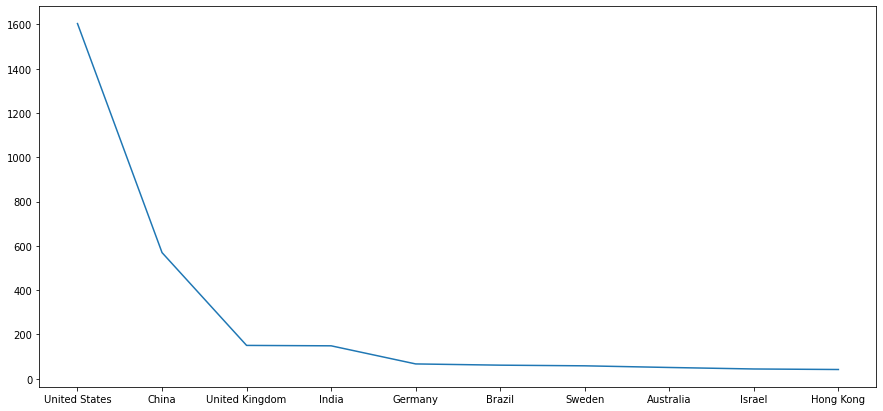

In [41]:
plt.figure(figsize = (15,7))
plt.plot(by_country2['Country'], by_country2['Valuation ($B)'])

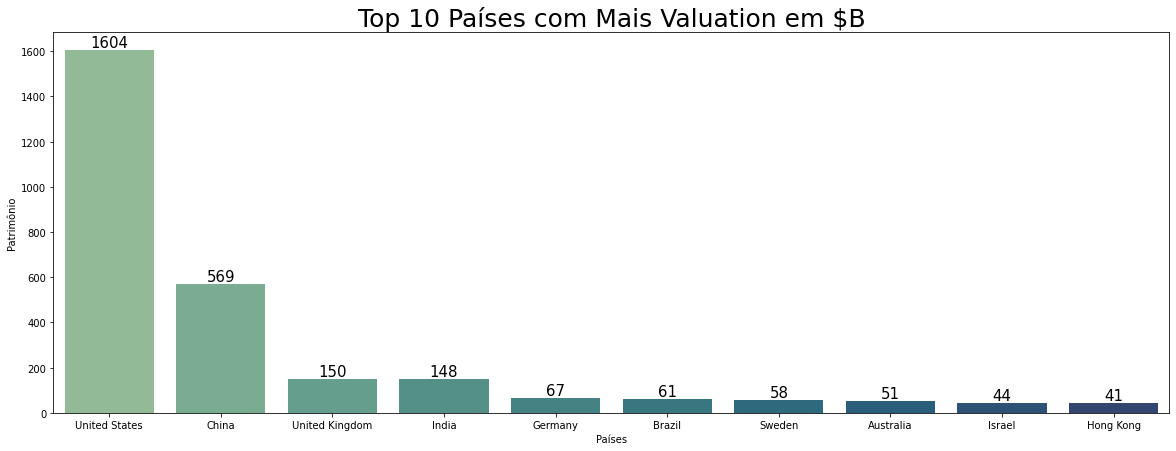

In [42]:
plt.figure(figsize = (20,7))
ax = sns.barplot(x = by_country2['Country'],y = by_country2['Valuation ($B)'],data = by_country,palette = 'crest')
ax.set_title('Top 10 Países com Mais Valuation em $B',fontdict = { 'fontsize': 25})

# Mostrando os Valores na Barra
for i in ax.patches:
  ax.annotate (round(i.get_height()),
              (i.get_x() + i.get_width()/2 ,i.get_height()),
              ha = 'center', va = 'baseline', 
              fontsize = 15, color = 'black', xytext = (0,3), textcoords = 'offset points')
  
plt.ylabel('Patrimônio')
plt.xlabel('Países')
plt.show()